# Projeto II - Processamento Digital de Sinais
<br> Alunos:
<br> Diego Hamilton
<br> Pedro Peixoto

## Introdução

<br> Falar um pouco

***
## Parte 1

### 1.1) Use o comando MATLAB butter para projetar um filtro passa-baixas IIR de sexta ordem, com frequência de corte de 0,5 Hz; considere que a frequência de amostragem é de 4 Hz. Esboce a magnitude e a fase da resposta em frequência (RF) do filtro. Esboce também o diagrama de polos e zeros (DPZ) e a parte significativa da resposta ao impulso do filtro. Comente sobre a relação entre esses gráficos. É possível obter quaisquer dois deles a partir do terceiro?


In [13]:
pkg load signal

In [90]:
f = 0.5;
fs = 4;
wc = f/fs;    % frequencia normalizada

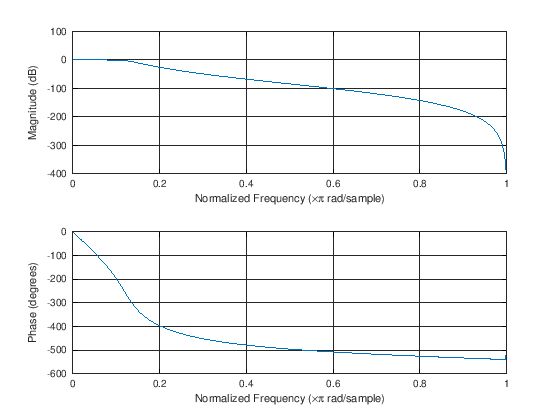

In [91]:
[b,a] = butter(6, wc, ftype = 'low');
freqz(b,a)

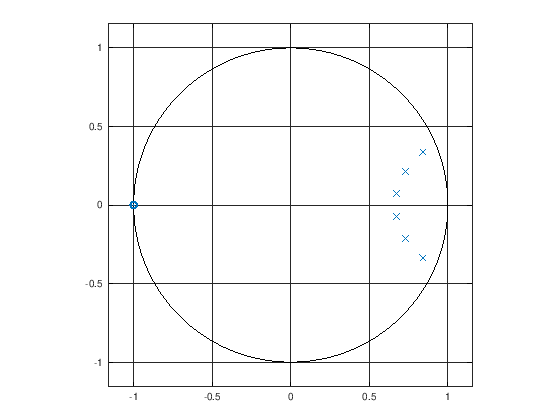

In [92]:
zplane(b,a)

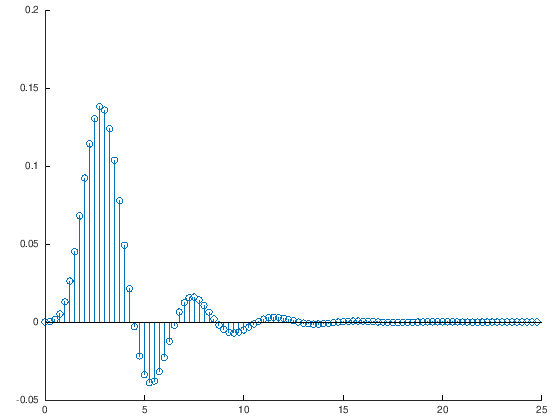

In [96]:
[h,t] = impz(b, a, 100, fs);
stem(t, h)

<br> Comentário sobre a relação entre os gráficos.
<br> Resposta sobre se é possível obter os dois primeiros através do terceiro.

### 1.2) Na transformação bilinear (TBL), considerando pelo menos três valores de T, esboce em uma mesma figura a relação entre a frequência digital $\omega$ e a frequência analógica $\Omega$. Se a frequência de corte do filtro analógico protótipo é $\Omega_C = 2 rad/s$, como a frequência de corte $\omega_C$ varia em função de T?
### Esboce essa função ($\omega_C = f(T)$).


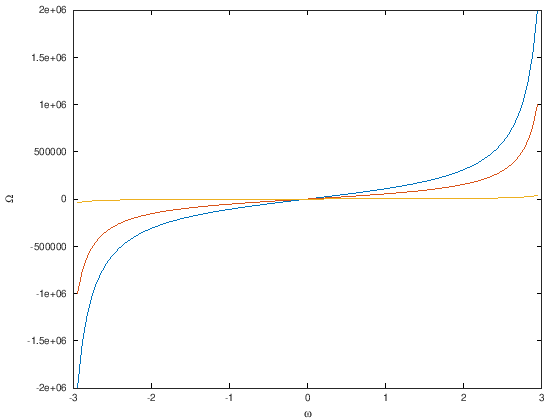

In [117]:
T1 = 1e-5;
T2 = 2e-5;
T3 = 5e-4;

function omega = tbl(w, ts)
    omega = (2/ts)*tan(w/2);
endfunction

w = linspace(-pi+2e-1, pi-2e-1, 100);    % nao contempla o intervalo por completo para enquadrar melhor o plot (nos valores de pi e -pi, omega tende a infinito)
plot(w, tbl(w, T1), w, tbl(w, T2), w, tbl(w, T3))
xlabel('\omega')
ylabel('\Omega')

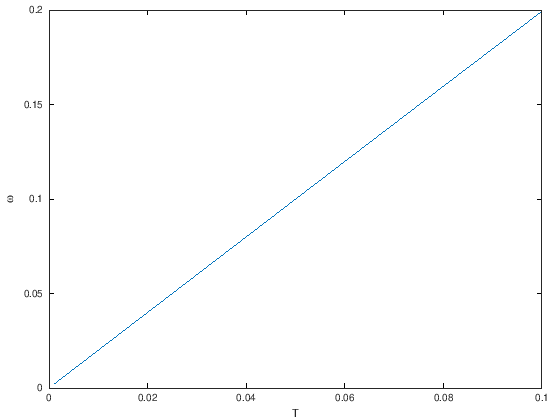

In [119]:
function w = tblinv(omega, ts)
    w = 2*atan((omega*ts)/2);
endfunction

T = linspace(1/10, 1/1000, 990);
plot(T, tblinv(2, T))
xlabel('T')
ylabel('\omega')

A partir do gráfico acima podemos ver que a frequência $\omega_C$ varia linearmente com o período de amostragem T

### 1.3) Use a TBL para projetar um filtro digital de Butterworth passa-baixas de ordem 4 e frequência de corte 8 kHz. Considere uma frequência de amostragem de 40 kHz.
#### i) Qual a frequência de corte do filtro protótipo?

In [148]:
fc = 8000;
fs = 40000;
wc = 2*pi*fc/fs;
omegac = tbl(wc, 1/fs);
new_fc = omegac/(2*pi)
new_wc = new_fc/fs;
[b, a] = butter(4, new_wc, ftype = 'low');

new_fc =  9250.6


#### ii) Encontre H(S) e esboce seu DPZ.

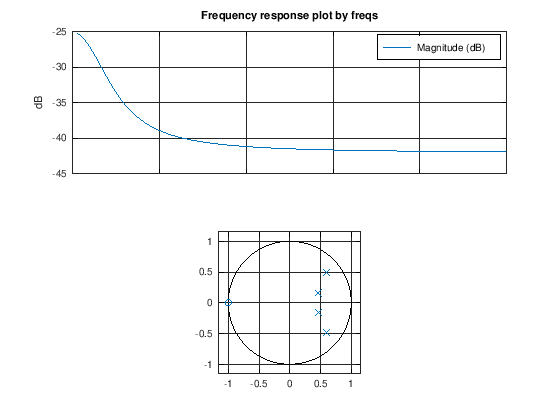

In [136]:
w = logspace(-1, 1, 100);
h = freqs(b, a, w);
freqs(b, a, w);
% plot(w, abs(h))
% plot(w, angle(h))

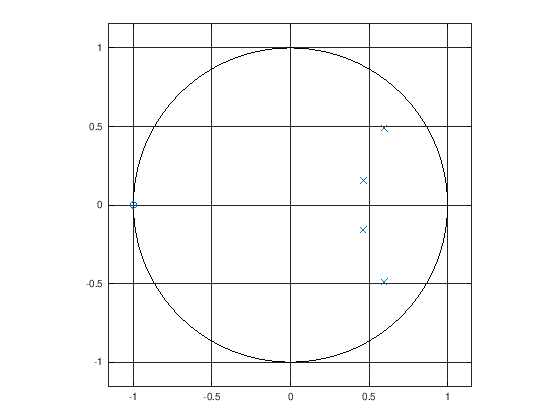

In [138]:
zplane(b,a);

#### iii) Encontre H(Z). Esboce a resposta em frequência, a resposta ao impulso e o DPZ de H(Z)

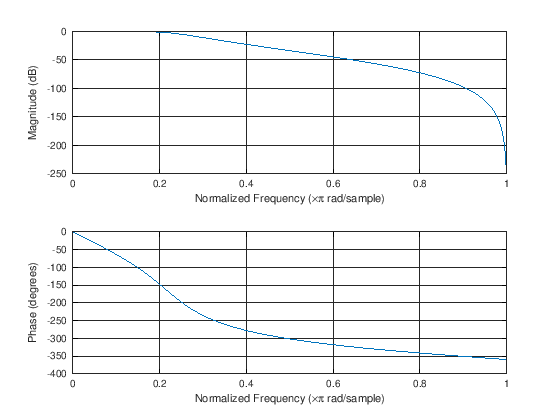

In [130]:
[h, w] = freqz(b,a);
freqz(b,a)

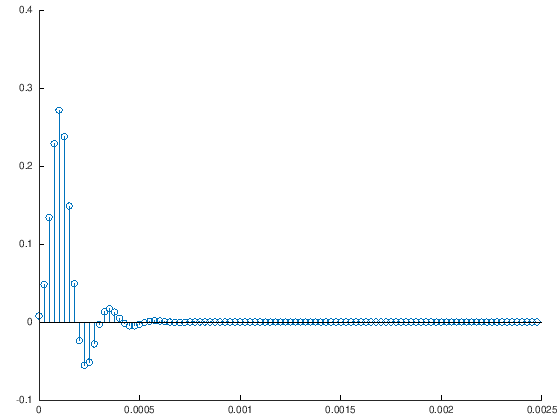

In [140]:
[h,t] = impz(b, a, 100, fs);
stem(t, h)

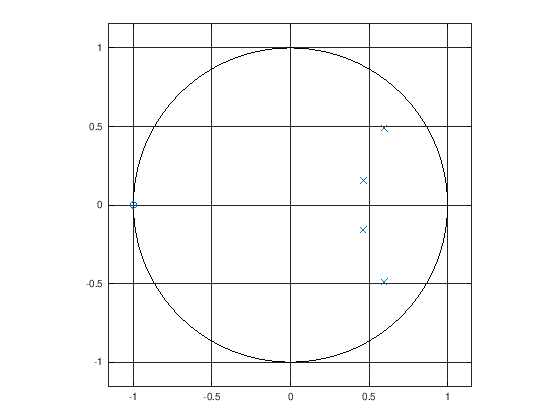

In [139]:
zplane(b, a)